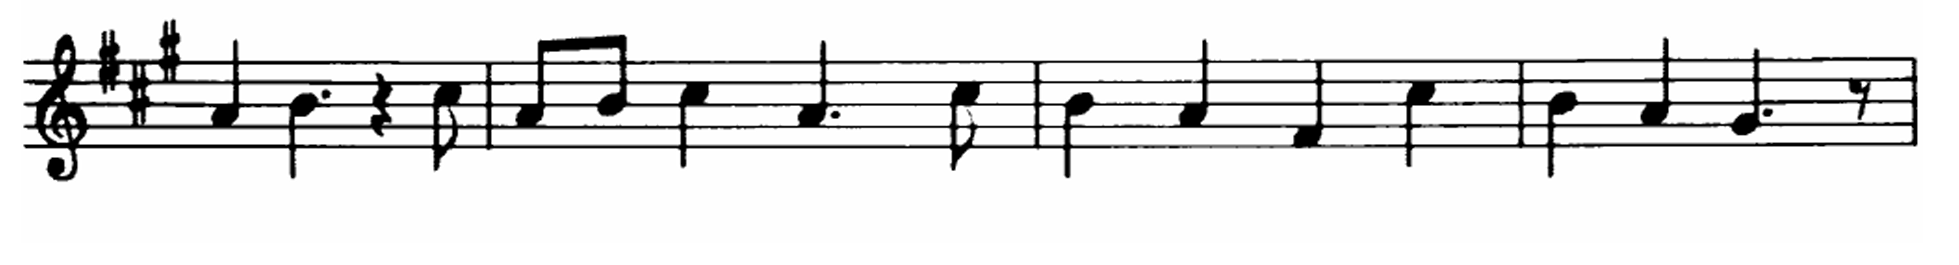

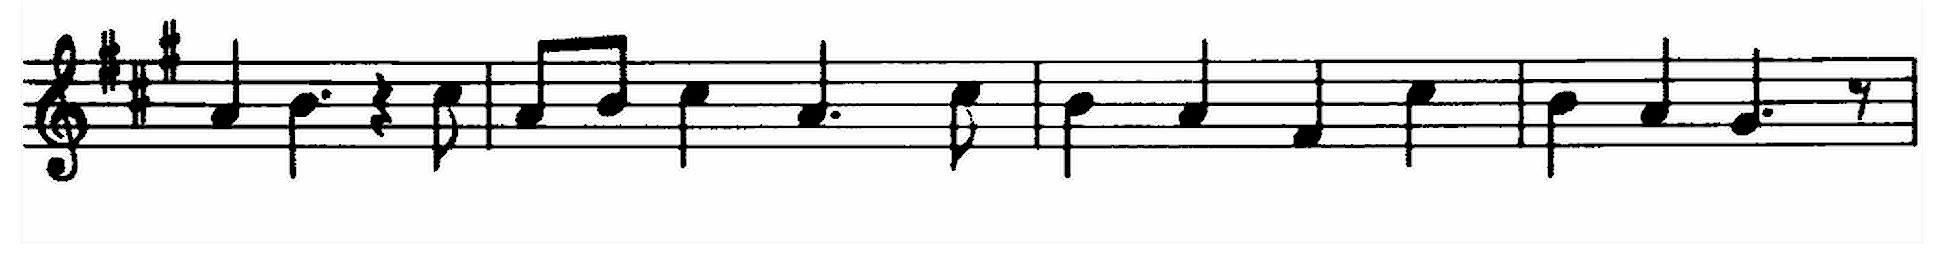

In [9]:
#Lapcian
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread ("/content/image.png")
cv2_imshow (image)
hsv_tf = tf.convert_to_tensor(image, dtype=tf.float32)
hsv_tf = tf.expand_dims(hsv_tf, axis=0)
lapcian_kernel = tf.constant([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]], dtype=tf.float32)
lapcian_kernel= tf.reshape(lapcian_kernel, [3, 3, 1, 1])
conv_channels = []
for i in range(3):
    channel = hsv_tf[:, :, :, i:i+1]
    conv_channel = tf.nn.conv2d(channel, lapcian_kernel, strides=[1, 1, 1, 1], padding='SAME')
    conv_channels.append(conv_channel)
l_v_tf = tf.concat(conv_channels, axis=-1)
l_v_tf = tf.clip_by_value(l_v_tf , 0, 255)
l_v_tf = hsv_tf - 10*l_v_tf
ans = tf.squeeze (l_v_tf)
ans = ans.numpy()
cv2_imshow(ans)



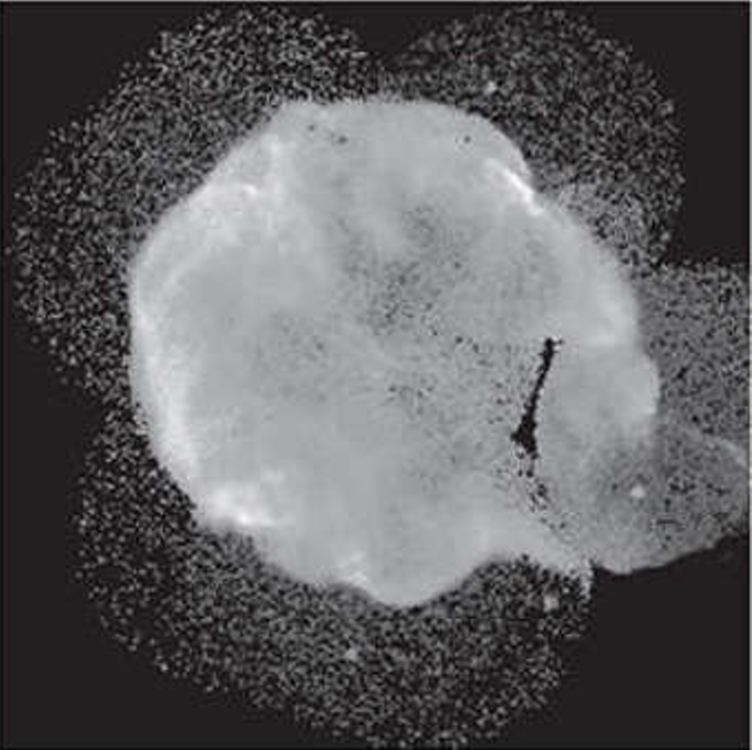

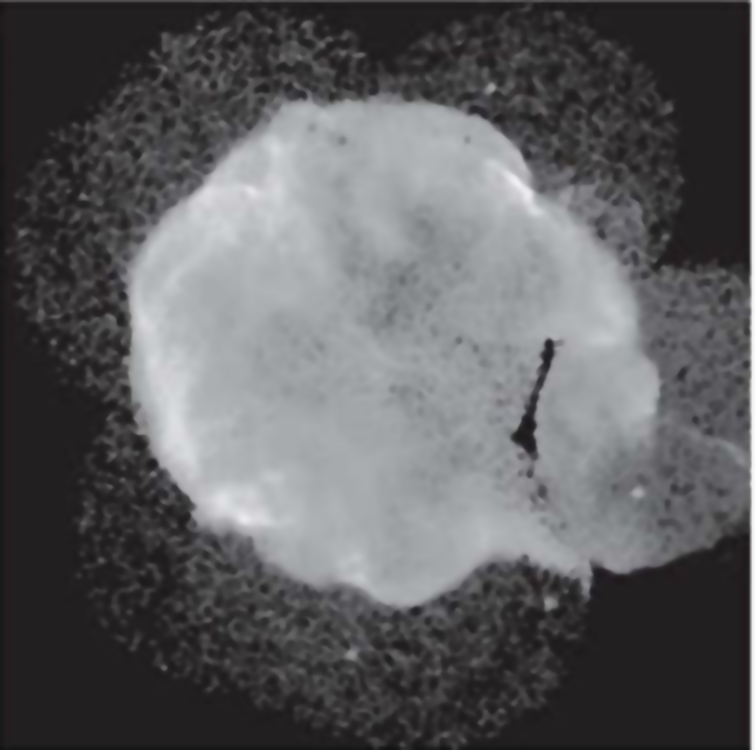

In [ ]:
# Cygnus Loop
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
hsv = cv2.imread ("/content/Screenshot 2025-04-28 122821.png")
cv2_imshow (hsv)
median_filtered = cv2.medianBlur(hsv, 5)
gaussian = cv2.GaussianBlur (median_filtered, (5, 5), 0)
bilateral = cv2.bilateralFilter(gaussian, d=9, sigmaColor=75, sigmaSpace=75)
ero = cv2.erode(bilateral, (3, 3), iterations=1)
cv2_imshow(ero)

# median filter and smooth

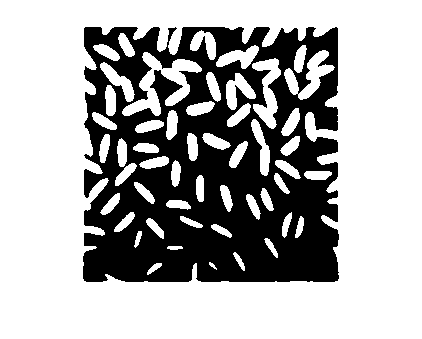

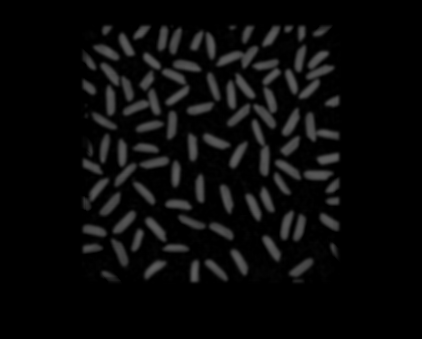

In [34]:
#Question 3 rice
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread ("/content/NonuniformIlluminationExample_01.png")
# cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)


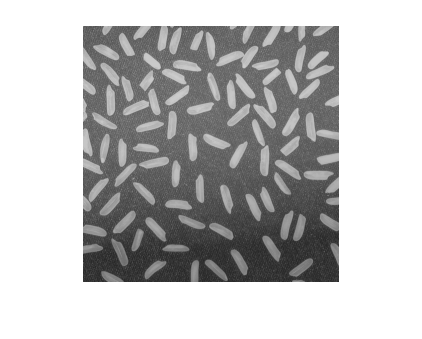

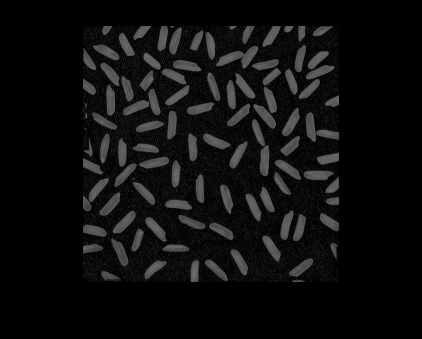

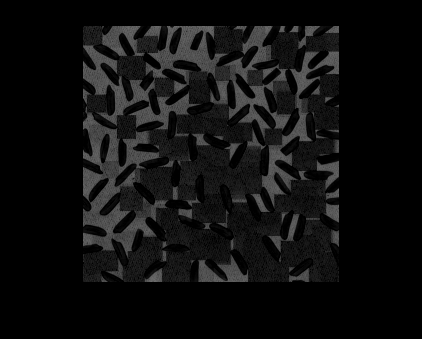

In [33]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load image and convert to grayscale
image = cv2.imread("/content/NonuniformIlluminationExample_01.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Define structuring element (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # You can tune the size

# Top-hat: original - opening
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)

# Bottom-hat: closing - original
bothat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(bothat)


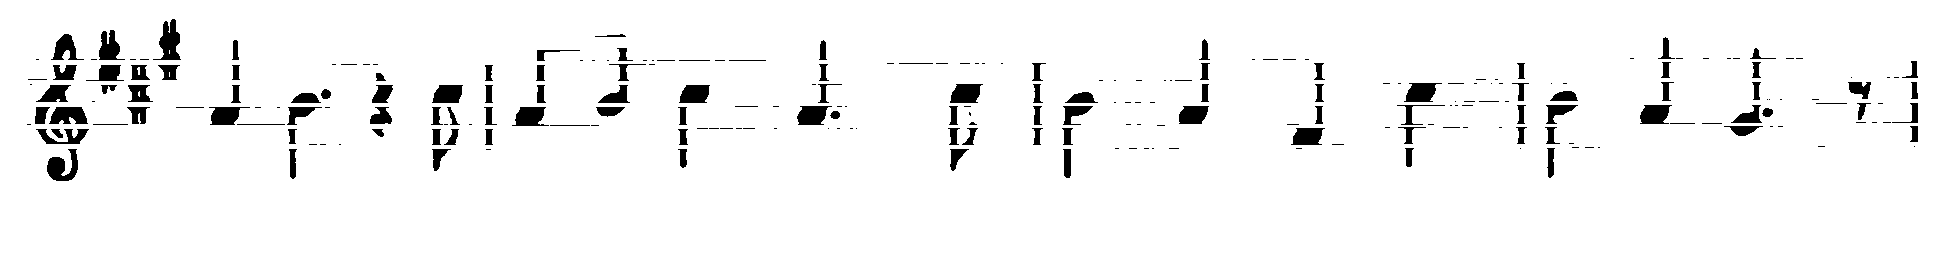

In [11]:
import cv2
import numpy as np
image = cv2.imread('/content/image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
detected_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
no_lines = cv2.subtract(binary, detected_lines)
result = cv2.bitwise_not(no_lines)
cv2_imshow(result)